In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('dataset.csv')
data1.shape

(22000, 2)

In [3]:
data2 = pd.read_csv('language_detection_data_s.csv')
data2.shape

(13153, 2)

In [4]:
data3 = pd.read_csv('Language Detection.csv')
data3.shape

(10337, 2)

In [5]:
data1 = data1.rename(columns={'language':'Language'})

In [6]:
data1.columns

Index(['Text', 'Language'], dtype='object')

In [7]:
data2.columns

Index(['Text', 'Language'], dtype='object')

In [8]:
data3.columns

Index(['Text', 'Language'], dtype='object')

In [9]:
data = pd.concat([data1, data2, data3], ignore_index=True, sort=False)
data.shape

(45490, 2)

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(44776, 2)

In [11]:
data['Language'].value_counts()

English       6606
French        6038
Darija        4381
Spanish       1812
Russian       1687
Dutch         1538
Arabic        1530
Turkish       1471
Tamil         1445
Hindi         1052
Chinese       1000
Korean        1000
Urdu          1000
Persian       1000
Japanese      1000
Thai          1000
Romanian      1000
Estonian       999
Portugese      997
Pushto         993
Swedish        992
Indonesian     975
Latin          953
Portugeese     736
Italian        694
Sweedish       673
Malayalam      591
German         465
Danish         424
Kannada        366
Greek          358
Name: Language, dtype: int64

In [13]:
# Languages
languages = set(data['Language'])
print('Languages', languages)
print('========')

Languages {'French', 'English', 'Urdu', 'Pushto', 'Spanish', 'Estonian', 'Japanese', 'Dutch', 'Portugeese', 'Chinese', 'Sweedish', 'Tamil', 'Russian', 'German', 'Hindi', 'Kannada', 'Romanian', 'Swedish', 'Portugese', 'Danish', 'Italian', 'Korean', 'Greek', 'Persian', 'Indonesian', 'Darija', 'Thai', 'Arabic', 'Malayalam', 'Latin', 'Turkish'}
Swedish & English: sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris 
Thai & English: ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม
Chinese & English: 年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由美國的獨立廠牌bip·record發行，以外國輸入盤的形式在日本發售，旋即被抢购一空。其後於月日發行以倉木麻衣名義發行的首張日文單曲《love day after tomorrow》，正式於日本出道。這張單曲初動銷量只得約萬張，可是其後每週銷量一直上升，並於年月正式

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

X=data['Text']
y=data['Language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

35820
8956
35820
8956


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
unigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1))
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
X_unigram_test_raw = unigramVectorizer.transform(X_test)
unigramFeatures = unigramVectorizer.get_feature_names()
print('Number of unigrams in training set:', len(unigramFeatures))

Number of unigrams in training set: 7875


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
def train_lang_dict(X_raw_counts, y_train):
    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v
            
    # to relative
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
        
    return lang_dict

language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

In [17]:
# Collect relevant chars per language
def getRelevantCharsPerLanguage(features, language_dict, significance=1e-5):
    relevantCharsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantCharsPerLanguage[lang] = chars
        v = language_dict[lang]
        for i in range(len(v)):
            if v[i] > significance:
                chars.append(features[i])
    return relevantCharsPerLanguage

relevantCharsPerLanguage = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram)
    
# Print number of unigrams per language
for lang in languages:    
    print(lang, len(relevantCharsPerLanguage[lang]))

French 97
English 142
Urdu 147
Pushto 204
Spanish 91
Estonian 89
Japanese 2051
Dutch 73
Portugeese 73
Chinese 3276
Sweedish 66
Tamil 128
Russian 104
German 47
Hindi 137
Kannada 91
Romanian 109
Swedish 71
Portugese 64
Danish 56
Italian 80
Korean 1380
Greek 82
Persian 100
Indonesian 80
Darija 748
Thai 142
Arabic 119
Malayalam 124
Latin 145
Turkish 115


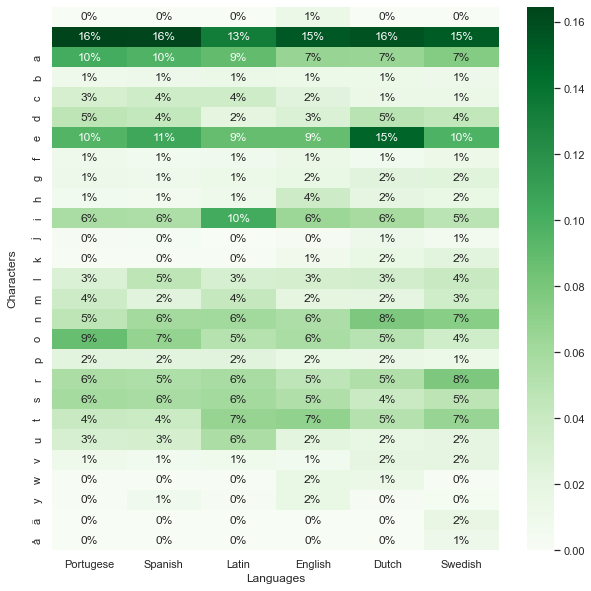

In [18]:
# get most common chars for a few European languages
europeanLanguages = ['Portugese', 'Spanish', 'Latin', 'English', 'Dutch', 'Swedish']
relevantChars_OnePercent = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram, 1e-2)

# collect and sort chars
europeanCharacters = []
for lang in europeanLanguages:
    europeanCharacters += relevantChars_OnePercent[lang]
europeanCharacters = list(set(europeanCharacters))
europeanCharacters.sort()

# build data
indices = [unigramFeatures.index(f) for f in europeanCharacters]
data = []
for lang in europeanLanguages:
    data.append(language_dict_unigram[lang][indices])

#build dataframe
df = pd.DataFrame(np.array(data).T, columns=europeanLanguages, index=europeanCharacters)
df.index.name = 'Characters'
df.columns.name = 'Languages'

# plot heatmap
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=0.8) # for label size
sn.set(rc={'figure.figsize':(10, 10)})
sn.heatmap(df, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='.0%')# font size
plt.show()

In [19]:
# number of bigrams
from sklearn.feature_extraction.text import CountVectorizer
bigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(2,2))
X_bigram_raw = bigramVectorizer.fit_transform(X_train)
bigramFeatures = bigramVectorizer.get_feature_names()
print('Number of bigrams', len(bigramFeatures))

Number of bigrams 160947


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
# top bigrams (>1%) for Spanish, Italian (Latin), English, Dutch, Chinese, Japanese, Korean
language_dict_bigram = train_lang_dict(X_bigram_raw.toarray(), y_train.values)
relevantCharsPerLanguage = getRelevantCharsPerLanguage(bigramFeatures, language_dict_bigram, significance=1e-2)
print('Spanish', relevantCharsPerLanguage['Spanish'])
print('Italian (Latin)', relevantCharsPerLanguage['Latin'])
print('English', relevantCharsPerLanguage['English'])
print('Dutch', relevantCharsPerLanguage['Dutch'])
print('Chinese', relevantCharsPerLanguage['Chinese'])
print('Japanese', relevantCharsPerLanguage['Japanese'])

Spanish [' a', ' c', ' d', ' e', ' l', ' p', ' s', 'a ', 'ar', 'de', 'e ', 'el', 'en', 'er', 'es', 'l ', 'la', 'n ', 'o ', 'os', 's ']
Italian (Latin) [' a', ' c', ' e', ' i', ' s', 'a ', 'an', 'at', 'e ', 'er', 'in', 'is', 'it', 'li', 'm ', 'ri', 's ', 't ', 'ta', 'ti', 'um', 'us']
English [' a', ' i', ' t', ' w', 'an', 'at', 'd ', 'e ', 'er', 'he', 'in', 'is', 'it', 'n ', 'on', 's ', 't ', 'th']
Dutch [' d', ' e', ' v', 'an', 'de', 'e ', 'ee', 'en', 'er', 'et', 'ge', 'in', 'n ', 'r ', 's ', 't ', 'te']
Chinese []
Japanese []


In [21]:
# Uni- & Bi-Gram Mixture CountVectorizer for top 1% features
from sklearn.feature_extraction.text import CountVectorizer

top1PrecentMixtureVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2), min_df=1e-2)
X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

language_dict_top1Percent = train_lang_dict(X_top1Percent_train_raw.toarray(), y_train.values)

top1PercentFeatures = top1PrecentMixtureVectorizer.get_feature_names()
print('Length of features', len(top1PercentFeatures))
print('')

#Unique features per language
relevantChars_Top1Percent = getRelevantCharsPerLanguage(top1PercentFeatures, language_dict_top1Percent, 1e-5)
for lang in relevantChars_Top1Percent:
    print("{}: {}".format(lang, len(relevantChars_Top1Percent[lang])))

Length of features 2110

French: 710
English: 678
Urdu: 705
Pushto: 812
Spanish: 560
Estonian: 559
Japanese: 715
Dutch: 554
Portugeese: 539
Chinese: 686
Sweedish: 511
Tamil: 463
Russian: 514
German: 444
Hindi: 502
Kannada: 108
Romanian: 522
Swedish: 528
Portugese: 518
Danish: 495
Italian: 478
Korean: 590
Greek: 235
Persian: 514
Indonesian: 476
Darija: 1025
Thai: 511
Arabic: 597
Malayalam: 312
Latin: 545
Turkish: 561


In [22]:
def getRelevantGramsPerLanguage(features, language_dict, top=50):
    relevantGramsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantGramsPerLanguage[lang] = chars
        v = language_dict[lang]
        sortIndex = (-v).argsort()[:top]
        for i in range(len(sortIndex)):
            chars.append(features[sortIndex[i]])
    return relevantGramsPerLanguage

top50PerLanguage_dict = getRelevantGramsPerLanguage(top1PercentFeatures, language_dict_top1Percent)

# top50
allTop50 = []
for lang in top50PerLanguage_dict:
    allTop50 += set(top50PerLanguage_dict[lang])

top50 = list(set(allTop50))
    
print('All items:', len(allTop50))
print('Unique items:', len(top50))

All items: 1550
Unique items: 636


In [23]:
# getRelevantColumnIndices
def getRelevantColumnIndices(allFeatures, selectedFeatures):
    relevantColumns = []
    for feature in selectedFeatures:
        relevantColumns = np.append(relevantColumns, np.where(allFeatures==feature))
    return relevantColumns.astype(int)

relevantColumnIndices = getRelevantColumnIndices(np.array(top1PercentFeatures), top50)


X_top50_train_raw = np.array(X_top1Percent_train_raw.toarray()[:,relevantColumnIndices])
X_top50_test_raw = X_top1Percent_test_raw.toarray()[:,relevantColumnIndices] 

print('train shape', X_top50_train_raw.shape)
print('test shape', X_top50_test_raw.shape)


train shape (35820, 636)
test shape (8956, 636)


In [24]:
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import scipy

In [25]:
# Utils for conversion of different sources into numpy array
def toNumpyArray(data):
    data_type = type(data)
    if data_type == np.ndarray:
        return data
    elif data_type == list:
        return np.array(data_type)
    elif data_type == scipy.sparse.csr.csr_matrix:
        return data.toarray()
    print(data_type)
    return None


def normalizeData(train, test):
    train_result = normalize(train, norm='l2', axis=1, copy=True, return_norm=False)
    test_result = normalize(test, norm='l2', axis=1, copy=True, return_norm=False)
    return train_result, test_result

def applyNaiveBayes(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = MultinomialNB()
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    return y_predict

def plot_F_Scores(y_test, y_predict):
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))

def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    unqiueLabel = np.unique(allLabels)
    df_cm = pd.DataFrame(confusionMatrix, columns=unqiueLabel, index=unqiueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    sn.set(font_scale=0.8) # for label size
    sn.set(rc={'figure.figsize':(15, 15)})
    sn.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')# font size
    plt.show()

/var/folders/rv/8p77w_d91rqcvsmkls9h9vm00000gn/T/ipykernel_26747/359894889.py:8: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.5895489057615007 (micro), 0.49510074341159654 (macro), 0.5072972474896215 (weighted)


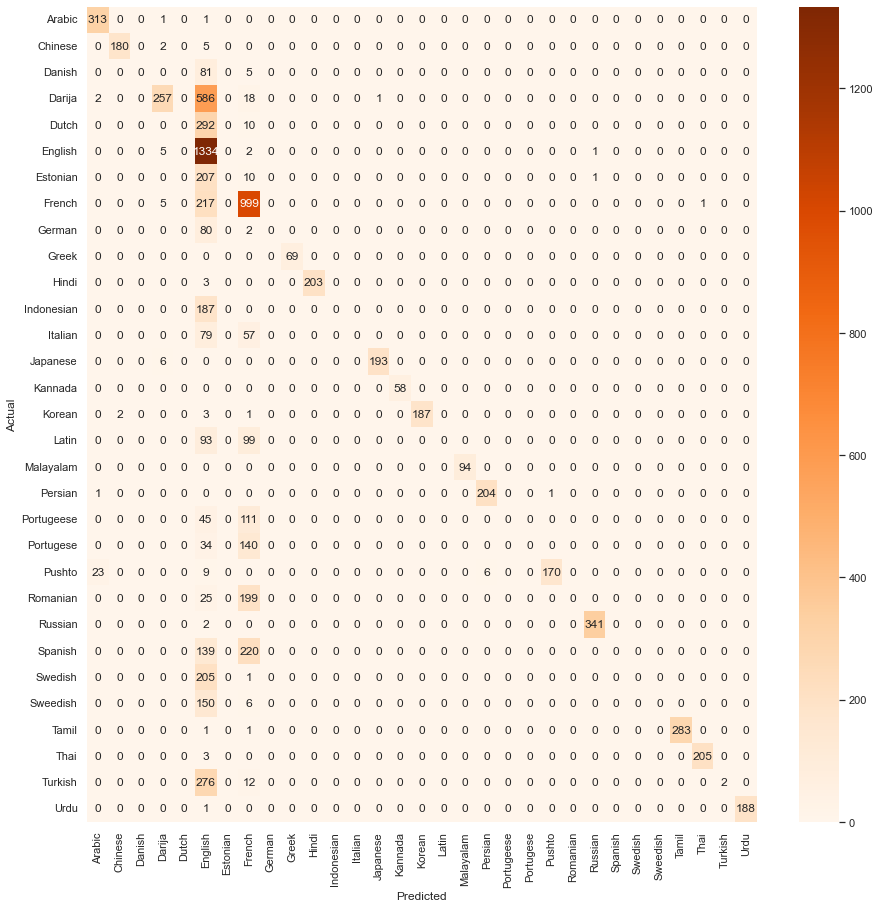

In [26]:
# Unigrams
X_unigram_train, X_unigram_test = normalizeData(X_unigram_train_raw, X_unigram_test_raw)
y_predict_nb_unigram = applyNaiveBayes(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_nb_unigram)
plot_Confusion_Matrix(y_test, y_predict_nb_unigram, "Oranges")

/var/folders/rv/8p77w_d91rqcvsmkls9h9vm00000gn/T/ipykernel_26747/359894889.py:8: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.7364895042429657 (micro), 0.5842961090841392 (macro), 0.6869538276508106 (weighted)


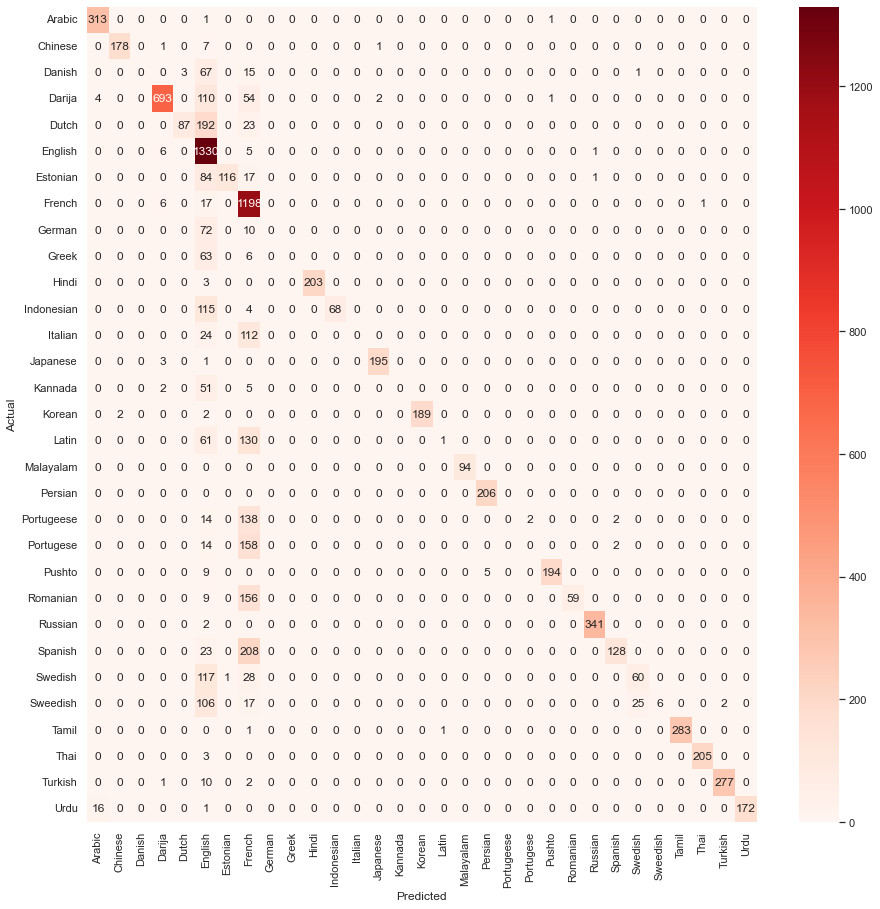

In [27]:
# Top 1%
X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)
y_predict_nb_top1Percent = applyNaiveBayes(X_top1Percent_train, y_train, X_top1Percent_test)
plot_F_Scores(y_test, y_predict_nb_top1Percent)
plot_Confusion_Matrix(y_test, y_predict_nb_top1Percent, "Reds")

F1: 0.7041089772219741 (micro), 0.5530286867859897 (macro), 0.6441456623734457 (weighted)


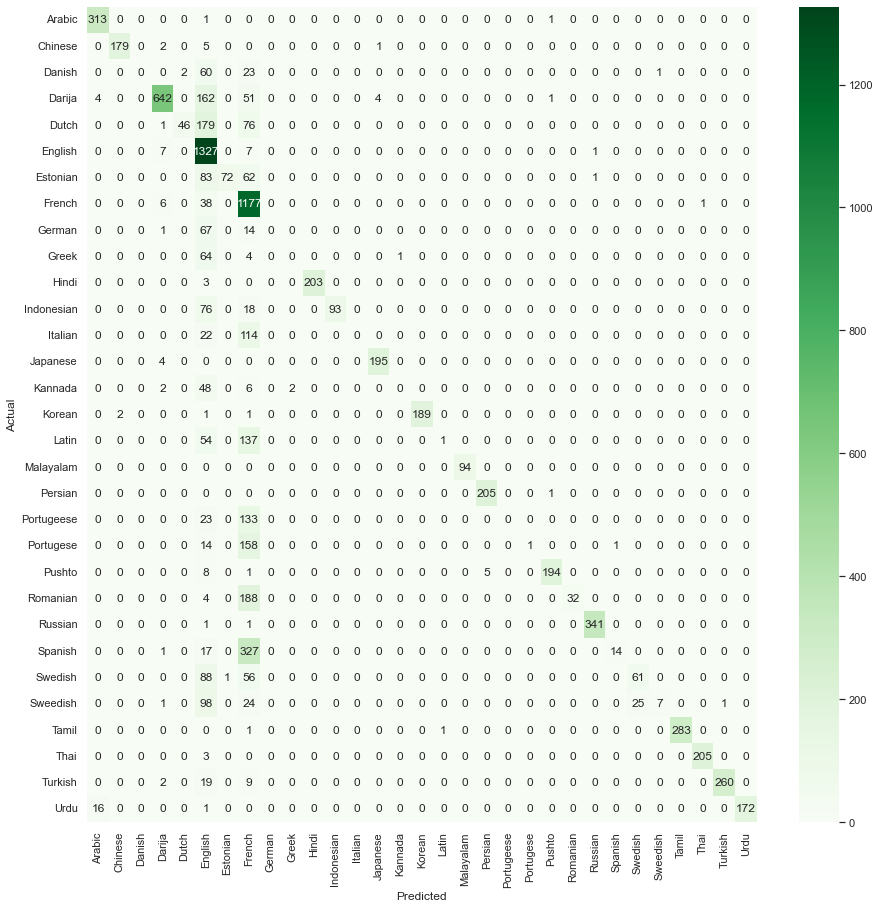

In [28]:
# Top 50
X_top50_train, X_top50_test = normalizeData(X_top50_train_raw, X_top50_test_raw)
y_predict_nb_top50 = applyNaiveBayes(X_top50_train, y_train, X_top50_test)
plot_F_Scores(y_test, y_predict_nb_top50)
plot_Confusion_Matrix(y_test, y_predict_nb_top50, "Greens")